<a href="https://colab.research.google.com/github/nitinsaimajji/voice1/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install python_speech_features


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5889 sha256=86dd1ef81c483683d874ce85a5f4b0cec94081b1a57cc3804d4ac656521e968f
  Stored in directory: /root/.cache/pip/wheels/5b/60/87/28af2605138deac93d162904df42b6fdda1dab9b8757c62aa3
Successfully built python_speech_features


In [ ]:
!git clone https://github.com/nitinsaimajji/voice1.git

Cloning into 'voice1'...
remote: Enumerating objects: 698, done.
remote: Counting objects: 100% (698/698), done.
remote: Compressing objects: 100% (665/665), done.
remote: Total 698 (delta 44), reused 670 (delta 29), pack-reused 0
Receiving objects: 100% (698/698), 152.71 MiB | 19.69 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Updating files: 100% (1207/1207), done.


In [ ]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **A1**

In [ ]:
import keras,os
from keras.datasets import fashion_mnist,cifar100
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from keras.models import Sequential 
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
import cv2
from keras import optimizers 
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers 
from sklearn import datasets #loaddataset
from sklearn.model_selection import train_test_split#splitdataset
from sklearn.preprocessing import StandardScaler#standardscaler
from sklearn.metrics import accuracy_score#checkaccuracy


In [ ]:
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X=train_X/255
test_X=test_X/255
train_X1=train_X[0:100]
train_Y1=train_Y[:100]
val_X=train_X[100:150]
val_Y_Onehot=to_categorical(train_Y[100:150])
train_Y_one_hot=to_categorical(train_Y1)
test_Y_one_hot=to_categorical(test_Y)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

## A2

Epoch 1/100
2/2 [==============================] - 3s 410ms/step - loss: 2.3044 - accuracy: 0.0900 - val_loss: 2.2710 - val_accuracy: 0.1800
Epoch 2/100
2/2 [==============================] - 0s 108ms/step - loss: 2.1725 - accuracy: 0.2500 - val_loss: 2.2369 - val_accuracy: 0.1000
Epoch 3/100
2/2 [==============================] - 0s 116ms/step - loss: 2.0544 - accuracy: 0.2200 - val_loss: 2.1980 - val_accuracy: 0.2000
Epoch 4/100
2/2 [==============================] - 0s 114ms/step - loss: 1.9186 - accuracy: 0.3900 - val_loss: 2.0915 - val_accuracy: 0.4400
Epoch 5/100
2/2 [==============================] - 0s 110ms/step - loss: 1.7452 - accuracy: 0.5900 - val_loss: 1.9021 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 121ms/step - loss: 1.5464 - accuracy: 0.5500 - val_loss: 1.6898 - val_accuracy: 0.4800
Epoch 7/100
2/2 [==============================] - 0s 109ms/step - loss: 1.3380 - accuracy: 0.6200 - val_loss: 1.5007 - val_accuracy: 0.5600
Epoch 8/100
2

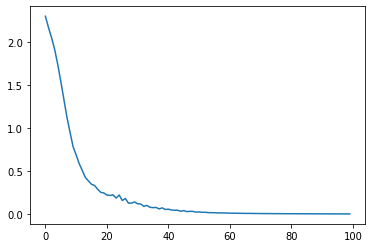

In [ ]:
history=model.fit(train_X1,train_Y_one_hot,batch_size=64,epochs=100,validation_data=(val_X,val_Y_Onehot))
plt.plot(history.history['loss'])

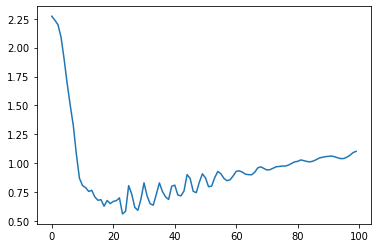

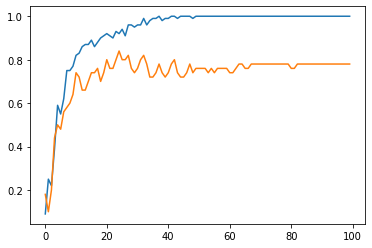

In [ ]:
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) 
plt.show()

## A3

In [ ]:

score=model.evaluate(test_X[0:100],test_Y_one_hot[0:100],verbose=1) 
print('\nKeras CNN binary accuracy:',score[1],'\n')

4/4 [==============================] - 0s 22ms/step - loss: 2.0736 - accuracy: 0.6600

Keras CNN binary accuracy: 0.6600000262260437 



A4

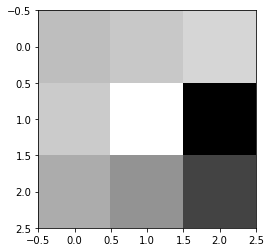

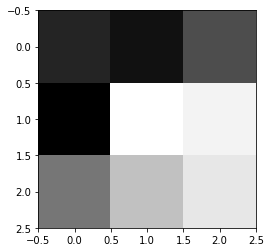

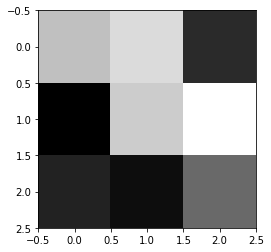

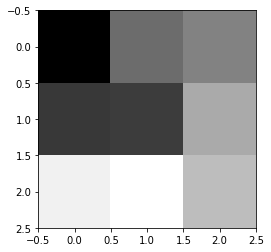

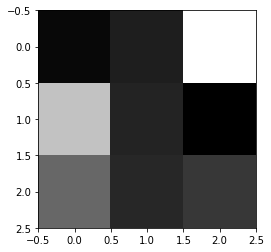

In [ ]:
filters,biases=model.layers[0].get_weights()
for i in range(5):
  plt.imshow(filters[:,:,0,i],cmap='gray') 
  plt.show()

A5

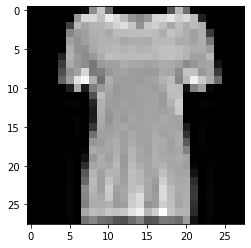

In [ ]:
from scipy import signal 
im=train_X[10]
plt.imshow(im,cmap='gray')
plt.show()

# ot=signal.convolve2d(im.reshape(28,28),filt[:,:,1].reshape(3,3),boundary='symm',mode='same')
# plt.imshow(ot,cmap='gray')
# #print(im.reshape(28,28),'\n',filt[:,:,1].reshape(3,3))#print(ot)

A6